In [28]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [30]:
worksheet = gc.open('DL Data').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float','Output':'float'})

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df.head()

,Input,Output
0,5.0,51.0
1,6.0,61.0
2,7.0,71.0
3,8.0,81.0
4,9.0,91.0


In [32]:
x=df[['Input']].values
x

array([[ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.]])

In [33]:
y=df[['Output']].values
y

array([[ 51.],
       [ 61.],
       [ 71.],
       [ 81.],
       [ 91.],
       [101.],
       [111.],
       [121.],
       [131.],
       [141.],
       [151.],
       [161.],
       [171.],
       [181.],
       [191.],
       [201.],
       [211.],
       [221.],
       [231.],
       [241.],
       [251.],
       [261.],
       [271.],
       [281.],
       [291.],
       [301.],
       [311.]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=11)

In [35]:
Scaler=MinMaxScaler()
Scaler.fit(x_train)
Scaler.fit(x_test)
x_train1=Scaler.transform(x_train)
x_test1=Scaler.transform(x_test)
x_train1

array([[ 1.0625],
       [-0.0625],
       [ 0.0625],
       [ 1.125 ],
       [ 0.75  ],
       [-0.1875],
       [ 1.3125],
       [ 1.4375],
       [ 1.1875],
       [ 0.9375],
       [ 0.25  ],
       [-0.125 ],
       [ 0.5625],
       [ 0.625 ],
       [ 1.25  ],
       [ 0.875 ],
       [ 0.8125],
       [ 1.375 ]])

In [36]:
ai_brain = Sequential([
    Dense(6,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1)
])

In [37]:
ai_brain.compile(
    optimizer='rmsprop',
    loss='mse'
)

In [38]:
ai_brain.fit(x_train1,y_train,epochs=4000)  

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 1303.0089
Epoch 1502/4000
1/1 [==============================] - 0s 12ms/step - loss: 1287.4703
Epoch 1503/4000
1/1 [==============================] - 0s 12ms/step - loss: 1272.1010
Epoch 1504/4000
1/1 [==============================] - 0s 14ms/step - loss: 1256.9004
Epoch 1505/4000
1/1 [==============================] - 0s 15ms/step - loss: 1241.8689
Epoch 1506/4000
1/1 [==============================] - 0s 14ms/step - loss: 1227.0061
Epoch 1507/4000
1/1 [==============================] - 0s 18ms/step - loss: 1212.3127
Epoch 1508/4000
1/1 [==============================] - 0s 10ms/step - loss: 1197.7891
Epoch 1509/4000
1/1 [==============================] - 0s 17ms/step - loss: 1183.4346
Epoch 1510/4000
1/1 [==============================] - 0s 14ms/step - loss: 1169.2520
Epoch 1511/4000
1/1 [==============================] - 0s 17ms/step - loss: 1155.2388
Epoch 1512/4000
1/1

Text(0.5, 1.0, 'Training Loss Vs Iteration Plot')

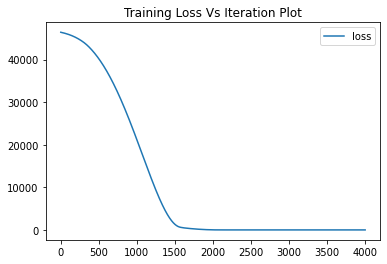

In [39]:
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()
plt.title('Training Loss Vs Iteration Plot')


In [40]:
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 211ms/step - loss: 0.0163


0.016272030770778656

In [41]:
x_n1=[[66]]
x_n1_1=Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

array([[661.4904]], dtype=float32)